In [15]:
import pandas as pd
import numpy as np
from pathlib import Path
from Bio import SeqIO

In [8]:
data_path = Path("./brca_metabric")
targets = pd.read_csv(data_path / "data_mrna_illumina_microarray.txt", sep="\t", header=0)

In [9]:
targets.head()

,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0185,MB-0503,MB-0641,MB-0201,...,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313,MB-4823
0,RERE,473,8.676978,9.653589,9.033589,8.814855,8.736406,9.274265,9.286585,8.437347,...,8.804947,9.991215,9.595923,9.637249,8.131637,9.606915,9.049296,8.858622,8.415867,9.902776
1,RNF165,494470,6.075331,6.687887,5.910885,5.628740,6.392422,5.908698,6.206729,6.095592,...,5.601472,7.103160,6.418987,6.203370,9.101942,7.427494,6.850000,6.550450,6.831722,7.338318
2,PHF7,51533,5.838270,5.600876,6.030718,5.849428,5.542133,5.964661,5.783374,5.737572,...,5.922894,6.181493,5.992153,6.230316,5.644587,5.927409,6.117095,5.936371,7.408960,5.875759
3,CIDEA,1149,6.397503,5.246319,10.111816,6.116868,5.184098,7.828171,8.744149,5.480091,...,6.488136,5.612846,6.241160,5.560488,5.611189,5.927031,6.374305,5.963092,9.181768,5.596873
4,TENT2,167153,7.906217,8.267256,7.959291,9.206376,8.162845,8.706646,8.518929,7.478413,...,8.534527,8.203819,8.813103,8.612911,7.798269,8.520545,8.499637,9.320207,6.804085,8.436732


In [11]:
mutations_df = pd.read_csv(data_path / "data_mutations.txt", sep="\t", header=0)

In [12]:
mutations_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot
0,TP53,NaN,METABRIC,GRCh37,17,7579344,7579345,+,frameshift_variant,Frame_Shift_Ins,...,NaN,NaN,ENST00000269305.4:c.343dup,p.His115ProfsTer34,p.H115Pfs*34,ENST00000269305,NM_001126112.2,114.0,-/C,0
1,TP53,NaN,METABRIC,GRCh37,17,7579346,7579347,+,protein_altering_variant,In_Frame_Ins,...,NaN,NaN,ENST00000269305.4:c.340_341insCTG,p.Leu114delinsSerVal,p.L114delinsSV,ENST00000269305,NM_001126112.2,114.0,ttg/tCTGtg,0
2,MLLT4,NaN,METABRIC,GRCh37,6,168299111,168299111,+,missense_variant,Missense_Mutation,...,NaN,NaN,ENST00000392108.3:c.1544G>T,p.Gly515Val,p.G515V,ENST00000392108,NM_001040000.2,515.0,gGa/gTa,0
3,NF2,NaN,METABRIC,GRCh37,22,29999995,29999995,+,missense_variant,Missense_Mutation,...,NaN,NaN,ENST00000338641.4:c.8G>T,p.Gly3Val,p.G3V,ENST00000338641,NM_000268.3,3.0,gGg/gTg,0
4,SF3B1,NaN,METABRIC,GRCh37,2,198288682,198288682,+,synonymous_variant,Silent,...,NaN,NaN,ENST00000335508.6:c.45T>A,p.Ile15=,p.I15=,ENST00000335508,NM_012433.2,15.0,atT/atA,0


In [13]:
cna_df = pd.read_csv(data_path / "data_cna.txt", sep="\t", header=0)

In [14]:
cna_df.head()

,Hugo_Symbol,Entrez_Gene_Id,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,...,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
0,A1BG,1.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,503538.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,A1CF,29974.0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,A2M,2.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A2M-AS1,144571.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Load Chromosome 3 and Chromosome 17 sequences:

In [24]:
def load_chromosome_seq(path: Path, fmt: str = "genbank"):
    return list(SeqIO.parse(path, fmt))[0]

In [25]:
seq_path = Path("./sequences")
chr17 = load_chromosome_seq(seq_path / "chr17.gb")

In [26]:
len(chr17)

83257441

In [27]:
chr3 = load_chromosome_seq(seq_path / "chr3.gb")

In [28]:
len(chr3)

198295559

Mutations dataframe has information about which chromosome a gene is located on. So we can filter out all genes that are present on the selected chromosomes

In [34]:
def filter_genes_on_chr(chr: int):
    return mutations_df[mutations_df["Chromosome"] == str(chr)]["Hugo_Symbol"].unique()

In [35]:
filter_genes_on_chr(17)

array(['TP53', 'ERBB2', 'DNAH2', 'NF1', 'BRCA1', 'MAP2K4', 'NCOR1',
       'GPS2', 'GH1', 'BCAS3', 'BRIP1'], dtype=object)

In [36]:
filter_genes_on_chr(3)

array(['PIK3CA', 'MAP3K13', 'ATR', 'CACNA2D3', 'FANCD2', 'PBRM1', 'SETD2',
       'SMARCC1', 'TBL1XR1', 'BAP1', 'FOXP1'], dtype=object)

Let's start with Chromosome 3 as it contains less genes.

Our goal is to predict the change in expression in microarray experiments using the sequence embedding and some simple regressor like Linear Regression, QDA or XGBoost

In [47]:
def select_rows_matching_genes(gene_list):
    return targets[targets["Hugo_Symbol"].isin(gene_list)]

In [89]:
chr17_targets = select_rows_matching_genes(
    filter_genes_on_chr(17)
)
chr17_targets = chr17_targets.drop("Entrez_Gene_Id", axis=1)
chr17_targets.reset_index(inplace=True)
chr17_targets = chr17_targets.transpose()
chr17_targets.columns = chr17_targets.loc["Hugo_Symbol"]
chr17_targets = chr17_targets.drop("index")
chr17_targets = chr17_targets.drop("Hugo_Symbol")
chr17_targets.reset_index(inplace=True)
chr17_targets = chr17_targets.drop("index", axis=1)

In [90]:
chr17_targets

Hugo_Symbol,NCOR1,MAP2K4,BRCA1,ERBB2,TP53,BCAS3,GPS2,BRIP1,GH1,DNAH2,NF1
0,7.378313,8.243855,6.101068,10.872596,6.270846,5.743798,8.128764,5.382175,5.279977,7.397898,5.900459
1,7.259581,7.650418,5.78641,13.836037,6.814312,5.792825,7.856108,5.423158,5.327353,5.398878,5.971286
2,7.011075,7.106913,5.71742,9.906015,6.28062,5.480899,8.033522,5.384241,5.296303,5.416694,5.851831
3,7.235334,7.951809,5.736365,10.77968,6.918135,6.087459,7.923664,5.250139,5.161414,6.832091,6.075218
4,6.827493,7.600453,6.346604,9.871677,6.439265,6.015167,7.939166,5.456023,5.206427,6.270889,5.595571
...,...,...,...,...,...,...,...,...,...,...,...
1975,7.283399,7.590173,5.859492,10.377979,6.484333,5.796882,7.976432,5.468336,5.378752,6.475841,6.198521
1976,6.773454,7.430383,5.532552,9.759673,6.603561,5.737701,7.628036,5.391733,5.308348,6.303407,6.145088
1977,7.64932,8.634382,6.969255,10.932273,5.966197,6.240877,8.037025,5.450123,5.417139,5.360342,6.464817
1978,5.739268,6.583153,6.186827,11.584169,5.622438,5.491993,8.640709,5.52309,5.321106,6.197719,5.732755


<Axes: >

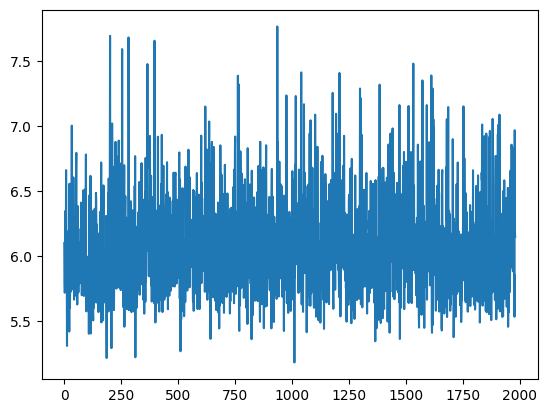

In [93]:
chr17_targets["BRCA1"].plot()